# Homework 1

## References

+ Lectures 1-2 (inclusive).

## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you can either:
    
    - Type the answer using the built-in latex capabilities. In this case, simply export the notebook as a pdf and upload it on gradescope; or
    - You can print the notebook (after you are done with all the code), write your answers by hand, scan, turn your response to a single pdf, and upload on gradescope.

+ The total homework points are 100. Please note that the problems are not weighed equally.

**Note**: Please match all the pages corresponding to each of the questions when you submit on gradescope.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('paper')
import numpy as np

## Student details

+ **First Name:** Alex
+ **Last Name:** Shank
+ **Email:** shank14@purude.edu

## Problem 1

This exercise demonstrates that probability theory is actually an extension of logic. Assume that you know that ``A implies B". That is, your prior information is:
$$
I = \{A \implies B\}.
$$
Please answer the following questions in the space provided:

A. (4 points) $p(AB|I) = p(A|I)$.<br>
<br>
**Proof:**
<br><br>
**Note for the remainder of this homework, I will treat $P(A|I)=P(A)$ and $P(B|I)=P(B)$. Essentially, we are acknowledging everything is implicitly in the context of our previous knowledge $I$.**
<br><br>
<center>
$p(B|A) = 1$ is given
<br>
$p(AB) = p(B|A)p(A)$
<br>
$p(AB) = 1*p(A)$
<br>
$p(AB) = p(A)$
</center>
<br>

B. If $p(A|I) = 1$, then $p(B|I) = 1$.
<br><br>
**Proof:**
<br><br>
<center>
$P(B|A)P(A)=P(A|B)P(B)$
<br>
$1*1=P(A|B)P(B)$
<br>
This implies that $P(A|B)=P(B)=1$
<br>
$P(B)=1$
</center>
<br>

C. If $p(B|I) = 0$, then $p(A|I) = 0$.
<br><br>
**Proof:**
<br><br>
Similiar to the above,
<br><br>
<center>
$P(B|A)P(A)=P(A|B)P(B)$
<br>
$P(B|A)P(A)=P(A|B)*0$
<br>
$1*P(A)=0$
<br>
$P(A)=0$
</center>
<br>

D. B and C show that probability theory is consistent with Aristotelian logic. Now, you will discover how it extends it. Show that if B is true, then A becomes more plausible, i.e.
$$
p(A|BI) \geq p(A|I).
$$
<br>
**Proof:**
<br><br>
<center>
$P(A|B) \geq P(A)$
<br>
$P(A|B) = \frac{P(B|A)P(A)}{P(B)} \geq P(A)$
<br>
$P(A|B) = \frac{1*P(A)}{P(B)} \geq P(A)$
<br>
$\frac{1}{P(B)} \geq 1$
<br>
$1 \geq P(B)$
<br><br>
All probabilities under the axiomatic approach are $\in [0, 1]$, making this statement true.

E. Give at least two examples of D that apply to various scientific fields. To get you started, here are two examples:

- $A$: It is raining. $B$: There are clouds in the sky. Clearly,  $A \implies B$. $D$ tells us that if there are clouds in the sky, raining becomes more plausible.
    
- $A$: General relativity. $B$: Light is deflected in the presence of massive bodies. Here  $A \implies B$. Observing that $B$ is true makes $A$ more plausible.

**Answer:**

- $A$: Ohm's Law
- $B$: The current through a conductor is proportionally related to the voltage across it (the proportionality constant being electrical resistance).
<br><br>
- $A$: Avagadro's Law
- $B$: Two gases with the same volume, temperature, and pressure are made up of the same number of molecules.

F. Show that if $A$ is false, then $B$ becomes less plausible, i.e.: 
$$
p(B|\neg AI) \leq p(B|I).
$$
<br><br>
**Proof:**
<br><br>
<center>
$P(B|\neg A) \leq P(B)$
<br>
$P(B|\neg A) \leq P(B|A)P(A)+P(B|\neg A)P(\neg A)$
<br>
$P(B|\neg A)(1-P(\neg A)) \leq P(B|A)P(A)$
<br>
$P(B|\neg A)P(A) \leq P(B|A)P(A)$
<br>
$P(B|\neg A) \leq P(B|A)$
<br>
$P(B|\neg A) \leq 1$
<br><br>
All probabilities under the axiomatic approach are $\in [0, 1]$, making this statement true.

G. Can you think of an example of scientific reasoning that involves F? For example:
$A$: It is raining. $B$: There are clouds in the sky. F tells us that if it is not raining, then it is less plausible that there are clouds in the sky.<br><br>
**Answer:**
<br><br>
<center>
    The examples from <code>1e</code> can also be used here. A new example would be:
</center>
<br>
$A$: Pascal's Law
<br>
$B$: Pressure is applied to a fluid, and that pressure is transmitted to all parts of the fluid without loss.
<br><br>
<center>
    If B weren't true, it would be less likely that A is a true logic statement (scientific law).
</center>
<br>

H. Do D and F contradict Karl Popper's [principle of falsification](https://en.wikipedia.org/wiki/Falsifiability), "A theory in the empirical sciences can never be proven, but it can be falsified, meaning that it can and should be scrutinized by decisive experiments."<br><br>
**Answer:**
<br><br>
No, they do not contradict the principle of falsification. Showing B always follows from A is by definition showing that A has not been falsified. In a way, D and F allow us to structure our falsification/experiment strategy.
<br><br>

---

## Problem 2

Disclaimer: This example is a modified version of the one found in a 2013 lecture on Bayesian Scientific Computing taught by Prof. Nicholas Zabaras.
I am not sure where the original problem is coming from.

We are tasked with assessing the usefulness of a tuberculosis test.
The prior information I is:

> The percentage of the population infected by tuberculosis is 0.4\%.
We have run several experiments and determined that:
+ If a tested patient has the disease, then 80\% of the time the test comes out positive.
+ If a tested patient does not have the disease, then 90\% of the time the test comes out negative.

To facilitate your analysis, consider the following logical sentences concerning a patient:

> A: The patient is tested and the test is positive.

> B: The patient has tuberculosis.

A. Find the probability that the patient has tuberculosis (before looking at the result of the test), i.e., $p(B|I)$. This is known as the base rate or the prior probability.<br><br>
**Givens:**
<br>
$P(B) = 0.004$
<br>
$P(A|B) = 0.80$
<br>
$P(\neg A | \neg B) = 0.90$
<br><br>
**Answer:**
<br>
<center>
    From the given information, we know that
    <br>
    $P(B) = 0.004$
</center>
<br>

B. Find the probability that the test is positive given that the patient has tuberculosis, i.e., $p(A|B,I)$.<br>
**Answer:**
<br>
<center>
    From the given information, we know that
    <br>
    $P(A|B) = 0.80$
</center>
<br><br>

C. Find the probability that the test is positive given that the patient does not have tuberculosis, i.e., $p(A|\neg B, I)$.<br>
**Answer:**
<br>
<center>
    From the given information, we know that
    <br>
    $P(\neg A|\neg B) = 0.90$
    <br><br>
    $P(A|\neg B) = 1 - P(\neg A|\neg B)$
    <br>
    $P(A|\neg B) = 1 - 0.90$
    <br>
    $P(A|\neg B) = 0.10$
</center>
<br><br>

D. Find the probability that a patient that tested positive has tuberculosis, i.e., $p(B|A,I)$.<br>
**Answer:**
<br>
<center>
    $P(B|A) = \frac{P(A|B)P(B)}{P(A)}$
    <br>
    $P(B|A) = \frac{(0.80)(0.004)}{P(A)}$
    <br><br>
    $P(A) = P(A|B)P(B)+P(A|\neg B)P(\neg B)$
    <br>
    $P(A) = (0.80)(0.004)+(0.10)(1-0.004)$
    <br>
    $P(A) = 0.1028$
    <br><br>
    $P(B|A) = \frac{(0.80)(0.004)}{0.1028}$
    <br>
    $P(B|A) = 0.0311284047$
</center>
<br><br>

E. Find the probability that a patient that tested negative has tuberculosis, i.e., $p(B|\neg A, I)$. Does the test change our prior state of knowledge about the patient? Is the test useful?<br>
**Answer:**
<br>
<center>
    $P(B|\neg A) = \frac{P(\neg A|B)P(B)}{P(\neg A)}$
    <br>
    $P(B|\neg A) = \frac{P(\neg A|B)(0.004)}{(1-0.1028)}$
    <br><br>
    $P(\neg A|B) = 1 - P(A|B)$
    <br>
    $P(\neg A|B) = 1 - 0.80$
    <br>
    $P(\neg A|B) = 0.20$
    <br><br>
    $P(B|\neg A) = \frac{(0.20)(0.004)}{0.8972}$
    <br>
    $P(B|\neg A) = 0.000891663$
    <br><br>
    <b><i>Yes, our prior state of knowledge about the patient changes based on the test result. A positive test is probabilistically more likely to be accurate than inaccurate. That is why the test is useful - the probability of a positive test is greater if the patient actually has tuberculosis.</i></b>
</center>
<br><br>

F. What would a good test look like? Find values for 
$$
p(A|B,I)= p(\text{test is positive} |\text{has tuberculosis},I),
$$
and
$$
p(A| \neg B, I) = p(\text{test is positive}|\text{does not have tuberculosis}, I),
$$
so that
$$
p(B|A, I) = p(\text{has tuberculosis}|\text{test is positive}, I) = 0.99.
$$
There are more than one solutions. How would you pick a good one? Thinking in this way can help you set goals if you work in R\&D. If you have time, try to figure out whether or not there exists such an accurate test for tuberculosis<br><br>
**Answer:**
<br>
<center>
    Let $P(A|B) = x$
    <br>
    Let $P(A|\neg B) = y$
    <br>
    Given $P(B)=0.004$
    <br>
    Want $P(B|A) = 0.99$
    <br><br>
    $P(B|A) = \frac{P(A|B)P(B)}{P(A)}$
    <br>
    $0.99 = \frac{(x)(0.004)}{P(A)}$
    <br><br>
    $P(A) = P(A|B)P(B)+P(A|\neg B)P(\neg B)$
    <br>
    $P(A) = (x)P(B)+(y)P(\neg B)$
    <br>
    $P(A) = (x)P(B)+(y)(1-P(B))$
    <br>
    $P(A) = (x)P(B)+(y)-(y)P(B)$
    <br><br>
    $0.99 = \frac{(x)(0.004)}{P(A)}$
    <br>
    $0.99 = \frac{(x)(0.004)}{(x)P(B)+(y)-(y)P(B)}$
    <br>
    $y[(0.99)(0.004)-0.99] = x[(0.004)(0.99)-(0.004)]$
    <br>
    $y = (0.0000405663)x$
    <br><br>
    <b>Choosing a combination of $x=P(A|B)$ and $y=P(A|\neg B)$ on the following graph ($x, y \in (0,1]$) will ensure that $P(B|A)=0.99$.</b>
</center>
<br><br>

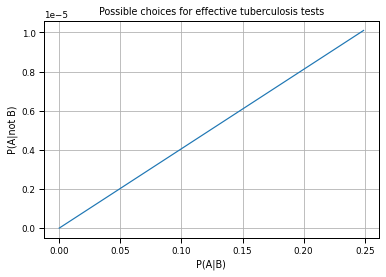

In [6]:
# Data for plotting
pA_B = np.arange(0.0, 0.25, 0.001)
pA_notB = 0.0000405663*pA_B

fig, ax = plt.subplots()
ax.plot(pA_B, pA_notB)

ax.set(xlabel='P(A|B)', ylabel='P(A|not B)',
       title='Possible choices for effective tuberculosis tests')
ax.grid()

fig.savefig("effective_tests.png")
plt.show()
